# K-means clustering

## import library

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [98]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

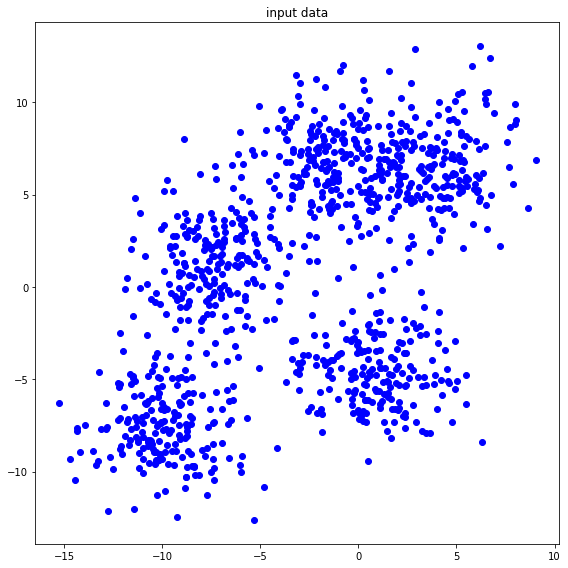

In [99]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [100]:
def compute_distance(feature, centroid):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    distance = 0

    tmp = (centroid - feature)**2
    distance += np.sqrt(tmp[:,0] + tmp[:,1])

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [101]:
def compute_centroid(feature, label_feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    labeled_data = []

    for i in range(len(label_feature)):
        if label_feature[i] == label:
            labeled_data.append(feature[i,:])
    
    labeled_data = np.array(labeled_data)
    # print(labeled_data.shape)
    
    row = np.mean(labeled_data[:,0]) if len(labeled_data) != 0 else 0
    col = np.mean(labeled_data[:,1]) if len(labeled_data) != 0 else 0
    centroid = np.c_[row,col]
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [102]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    label_feature = []
    for i in range(len(distance)):
        a = distance[i].argmin()
        label_feature.append(a)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


In [103]:
# 따로 정의한 함수
def compute_loss(feature, centroids, label_feature,number_cluster):
    loss = 0

    tmp = np.c_[feature, label_feature]

    for i in range(number_cluster):
        distance = sum(compute_distance(tmp[tmp[:,2]==i][:,:2], centroids[i]))

        loss += distance
    
    loss /= len(feature)

    return loss


## the number of clusters $K = 2$

In [104]:
number_cluster          = 2
number_iteration        = 20     # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))

In [105]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

# num_cluster=2, num_feature=2
centroid = np.zeros(shape=(number_cluster,number_feature))
distance = np.zeros(shape=(number_data,number_cluster))

for iter in range(number_iteration):
    for i in range(number_cluster):
        centroid[i] = compute_centroid(feature,label_feature_02, i)
        distance[:,i] = compute_distance(feature,centroid[i])

    label_feature_02 = compute_label(distance)
    loss = compute_loss(feature,centroid,label_feature_02, number_cluster)
    
    centroid_iteration_02[iter] = centroid
    loss_iteration_02[iter] = loss
    
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 4$

In [106]:
number_cluster          = 4
number_iteration        = 20     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [107]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
centroid = np.zeros(shape=(number_cluster,number_feature))
distance = np.zeros(shape=(number_data,number_cluster))

for iter in range(number_iteration):
    for i in range(number_cluster):
        centroid[i] = compute_centroid(feature,label_feature_04, i)
        distance[:,i] = compute_distance(feature,centroid[i])

    label_feature_04 = compute_label(distance)
    loss = compute_loss(feature,centroid,label_feature_04, number_cluster)
    
    centroid_iteration_04[iter] = centroid
    loss_iteration_04[iter] = loss
    
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 8$

In [108]:
number_cluster          = 8
number_iteration        = 20     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [109]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
centroid = np.zeros(shape=(number_cluster,number_feature))
distance = np.zeros(shape=(number_data,number_cluster))

for iter in range(number_iteration):
    for i in range(number_cluster):
        # print(feature.shape)
        centroid[i] = compute_centroid(feature,label_feature_08, i)
        distance[:,i] = compute_distance(feature,centroid[i])

    label_feature_08 = compute_label(distance)
    loss = compute_loss(feature,centroid,label_feature_08, number_cluster)
    
    centroid_iteration_08[iter] = centroid
    loss_iteration_08[iter] = loss
    
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 16$

In [110]:
number_cluster          = 16
number_iteration        = 20     # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [111]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
centroid = np.zeros(shape=(number_cluster,number_feature))
distance = np.zeros(shape=(number_data,number_cluster))

for iter in range(number_iteration):
    for i in range(number_cluster):
        centroid[i] = compute_centroid(feature,label_feature_16, i)
        distance[:,i] = compute_distance(feature,centroid[i])

    label_feature_16 = compute_label(distance)
    loss = compute_loss(feature,centroid,label_feature_16, number_cluster)
    
    centroid_iteration_16[iter] = centroid
    loss_iteration_16[iter] = loss
    
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## functions for presenting the results

---

---

In [112]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [113]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [114]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [115]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [116]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [117]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [118]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [119]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [120]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    # 처음 centroid
    x = centroid_iteration_02[0,:,0]
    y = centroid_iteration_02[0,:,1]
    plt.scatter(x, y, color = 'blue', label = 'initial')
    
    # 마지막 centroid
    x = centroid_iteration_02[len(centroid_iteration_02)-1,:,0]
    y = centroid_iteration_02[len(centroid_iteration_02)-1,:,1]
    plt.scatter(x, y, color = 'red', marker = 's', label = 'final')
    

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [121]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    # 처음 centroid
    x = centroid_iteration_04[0,:,0]
    y = centroid_iteration_04[0,:,1]
    plt.scatter(x, y, color = 'blue', label = 'initial')
    
    # 마지막 centroid
    x = centroid_iteration_04[len(centroid_iteration_04)-1,:,0]
    y = centroid_iteration_04[len(centroid_iteration_04)-1,:,1]
    plt.scatter(x, y, color = 'red', marker = 's', label = 'final')
    

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [122]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    # 처음 centroid
    x = centroid_iteration_08[0,:,0]
    y = centroid_iteration_08[0,:,1]
    plt.scatter(x, y, color = 'blue', label = 'initial')
    
    # 마지막 centroid
    x = centroid_iteration_08[len(centroid_iteration_08)-1,:,0]
    y = centroid_iteration_08[len(centroid_iteration_08)-1,:,1]
    plt.scatter(x, y, color = 'red', marker = 's', label = 'final')
    

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [123]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # 처음 centroid
    x = centroid_iteration_16[0,:,0]
    y = centroid_iteration_16[0,:,1]
    plt.scatter(x, y, color = 'blue', label = 'initial')
    
    # 마지막 centroid
    x = centroid_iteration_16[len(centroid_iteration_16)-1,:,0]
    y = centroid_iteration_16[len(centroid_iteration_16)-1,:,1]
    plt.scatter(x, y, color = 'red', marker = 's', label = 'final')
    

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [124]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    number_cluster=2
    data = np.c_[feature,label_feature_02]

    plot = plt.scatter(data[:,0:2][:,0],
                data[:,0:2][:,1],
                c = label_feature_02, s = 30, edgecolor = 'none')

    cbar = plt.colorbar(plot, ticks = np.arange(0, number_cluster))
    cbar.ax.set_ylabel('cluster')
    plt.tight_layout()
    plt.show()


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [125]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    number_cluster=4
    data = np.c_[feature,label_feature_04]

    plot = plt.scatter(data[:,0:2][:,0],
                data[:,0:2][:,1],
                c = label_feature_04, s = 30, edgecolor = 'none')

    cbar = plt.colorbar(plot, ticks = np.arange(0, number_cluster))
    cbar.ax.set_ylabel('cluster')
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [126]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    number_cluster=8
    data = np.c_[feature,label_feature_08]
    
    plot = plt.scatter(data[:,0:2][:,0],
                data[:,0:2][:,1],
                c = label_feature_08, s = 30, edgecolor = 'none')

    cbar = plt.colorbar(plot, ticks = np.arange(0, number_cluster))
    cbar.ax.set_ylabel('cluster')
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [127]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    number_cluster=16
    data = np.c_[feature,label_feature_16]

    plot = plt.scatter(data[:,0:2][:,0],
                data[:,0:2][:,1],
                c = label_feature_16, s = 30, edgecolor = 'none')

    cbar = plt.colorbar(plot, ticks = np.arange(0, number_cluster))
    cbar.ax.set_ylabel('cluster')
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) =  5.0933204564
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) =  2.8867264896
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) =  2.1733744659
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) =  1.6464912062
**************************************************
## [RESULT 05]
**************************************************


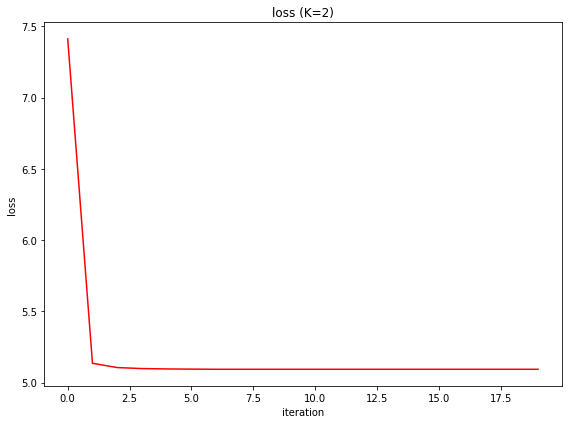

**************************************************
## [RESULT 06]
**************************************************


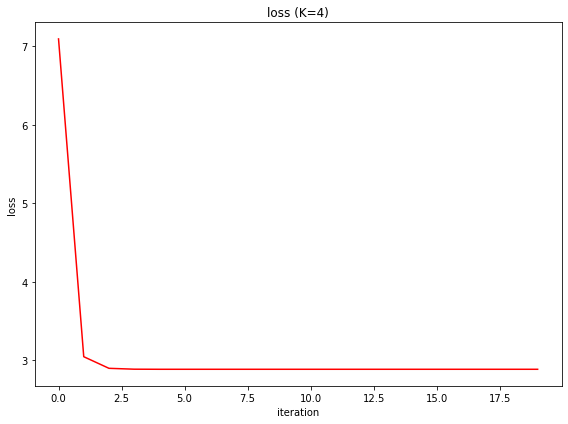

**************************************************
## [RESULT 07]
**************************************************


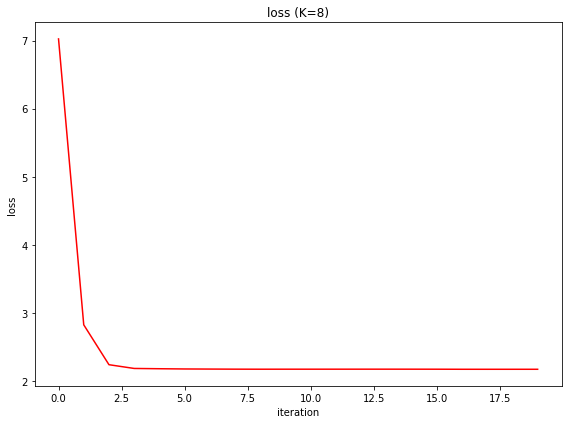

**************************************************
## [RESULT 08]
**************************************************


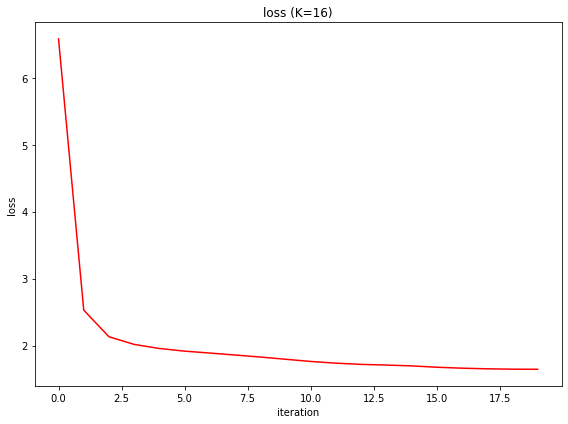

**************************************************
## [RESULT 09]
**************************************************
**************************************************
## [RESULT 10]
**************************************************
**************************************************
## [RESULT 11]
**************************************************
**************************************************
## [RESULT 12]
**************************************************
**************************************************
## [RESULT 13]
**************************************************


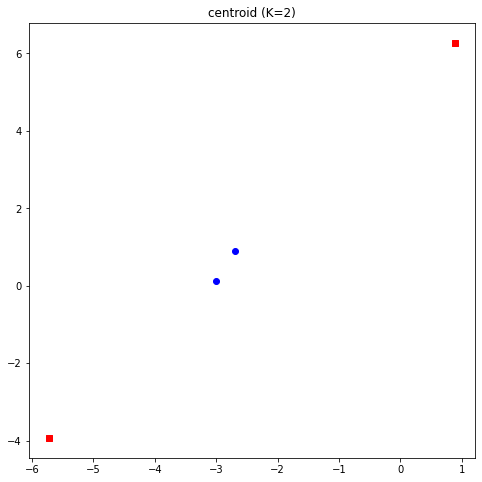

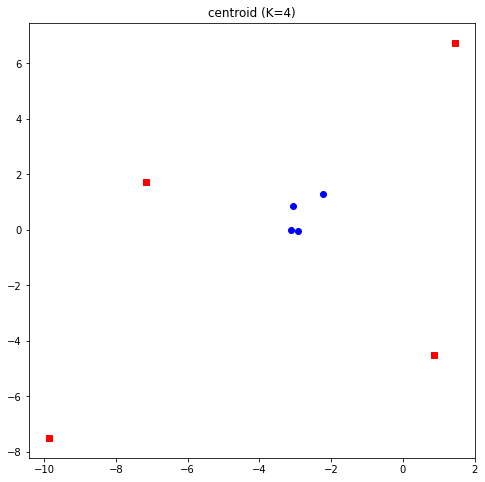

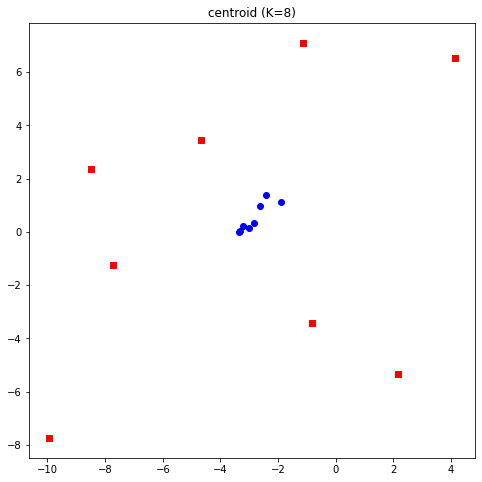

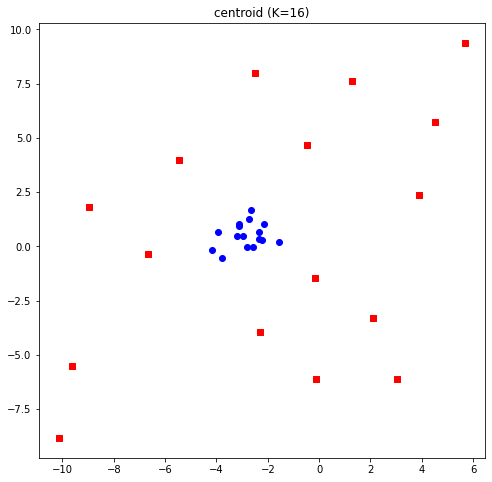

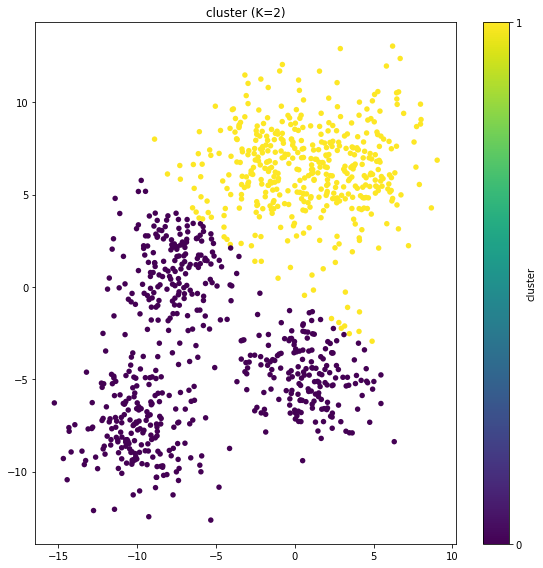

**************************************************
## [RESULT 14]
**************************************************


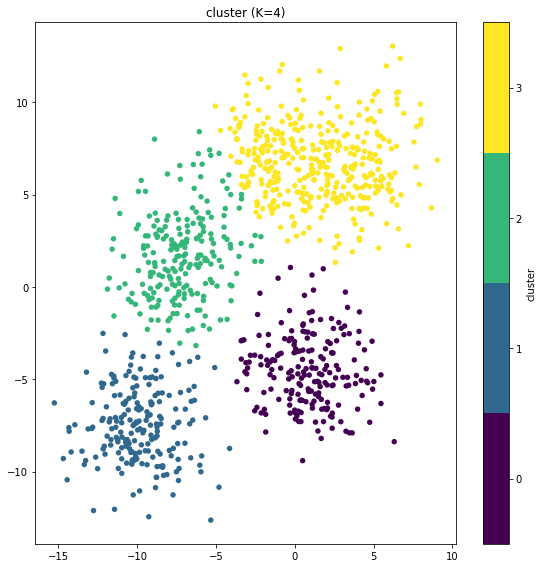

**************************************************
## [RESULT 15]
**************************************************


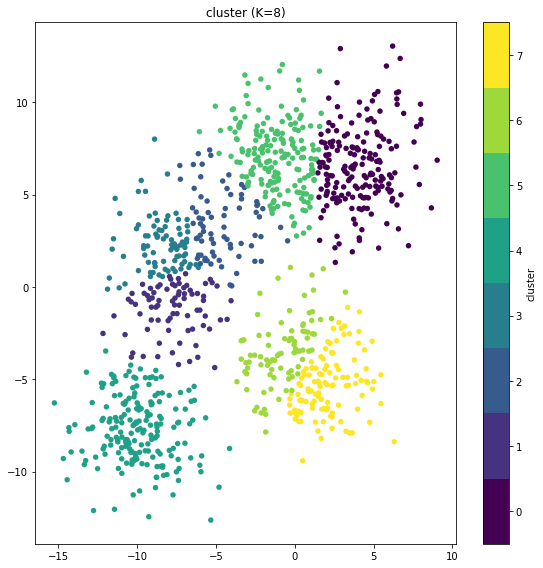

**************************************************
## [RESULT 16]
**************************************************


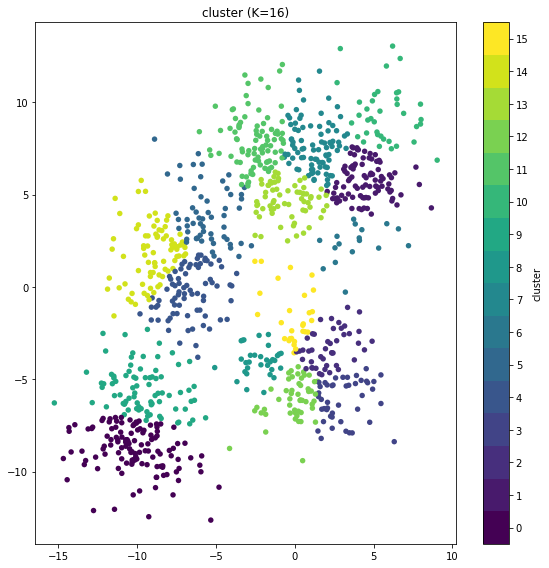

In [128]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)